In [1]:
import json
import os
import re
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
INPUT_DIR = '/Users/antai/Desktop/449project/data'
image_paths = sorted(os.listdir(os.path.join(INPUT_DIR, 'images/Part_1')))
annotation_paths = sorted(os.listdir(os.path.join(INPUT_DIR, 'annotations/Part_1')))
print('# of train images:', len(image_paths))
print('# of train annotations:', len(annotation_paths))

# of train images: 1000
# of train annotations: 1000


In [3]:
def preprocess_json(path):
    with open(path, 'r') as file:
        content = file.read()
    content = '[' + content + ']'
    pattern = r'\]\]\]}'
    matches = list(re.finditer(pattern, content))
    new_content = []
    start_pos = 0

    for match in matches[:-1]:  # Exclude the last match
        end_pos = match.end()
        new_content.append(content[start_pos:end_pos])
        new_content.append(',')  # Add a ',' after the pattern
        start_pos = end_pos

    new_content.append(content[start_pos:])

    # Combine the modified content
    modified_content = ''.join(new_content)
    with open(path, 'w') as file:
        file.write(modified_content)

def load_text_bb(path):
    merged = {}
    with open(path, 'r') as f:
        text_bb = json.load(f)
    for i in range(len(text_bb)):
        merged.update(text_bb[i])
    return merged

In [4]:
text_bb_path = "/Users/antai/Desktop/449project/code/aws-text-extraction/result/ocr-image-text.json"
text_polygon_path = "/Users/antai/Desktop/449project/code/aws-text-extraction/result/aws-rekognition-output copy.json"
# preprocess_json(path=text_bb_path)
text_bb = load_text_bb(path=text_bb_path)
text_polygon = load_text_bb(path=text_polygon_path)

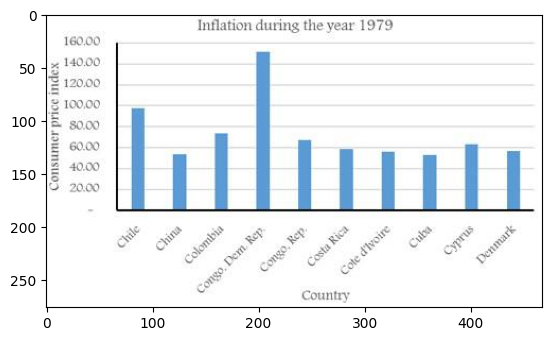

In [21]:
# index = 444
index = 123
image = cv2.imread(os.path.join(INPUT_DIR, 'images/Part_1/'+''.join(image_paths[index])))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

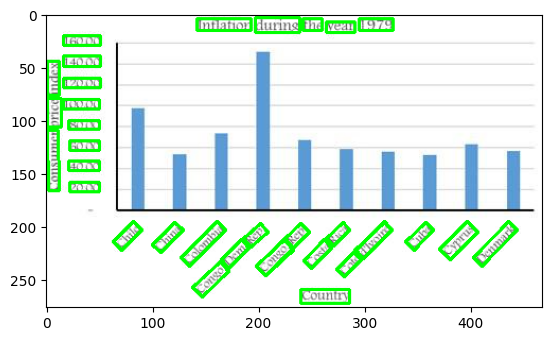

In [26]:
for text in text_polygon[image_paths[index]]['TextDetections']:
    if text['Type'] == 'WORD':
        polygon_points = text['Geometry']['Polygon']
        height, width, _ = image.shape
        scaled_points = np.array([[int(p['X'] * width), int(p['Y'] * height)] for p in polygon_points], dtype=np.int32)
        line_color = (0, 255, 0) # Green color in BGR format
        line_thickness = 2
        cv2.polylines(image, [scaled_points], isClosed=True, color=line_color, thickness=line_thickness)
plt.imshow(image)
plt.show()

In [25]:
text_polygon[image_paths[index]]['TextDetections']

[{'DetectedText': '160.00',
  'Type': 'LINE',
  'Id': 0,
  'Confidence': 99.5191879272461,
  'Geometry': {'BoundingBox': {'Width': 0.07407407462596893,
    'Height': 0.03381643444299698,
    'Left': 0.03490028530359268,
    'Top': 0.07367148995399475},
   'Polygon': [{'X': 0.03490028530359268, 'Y': 0.07367148995399475},
    {'X': 0.10897435992956161, 'Y': 0.07367148995399475},
    {'X': 0.10897435992956161, 'Y': 0.10748792439699173},
    {'X': 0.03490028530359268, 'Y': 0.10748792439699173}]}},
 {'DetectedText': '140.00',
  'Type': 'LINE',
  'Id': 1,
  'Confidence': 98.71453857421875,
  'Geometry': {'BoundingBox': {'Width': 0.07407407462596893,
    'Height': 0.03381643444299698,
    'Left': 0.03490028530359268,
    'Top': 0.14492753148078918},
   'Polygon': [{'X': 0.03490028530359268, 'Y': 0.14492753148078918},
    {'X': 0.10897435992956161, 'Y': 0.14492753148078918},
    {'X': 0.10897435992956161, 'Y': 0.17874397337436676},
    {'X': 0.03490028530359268, 'Y': 0.17874397337436676}]}},
 

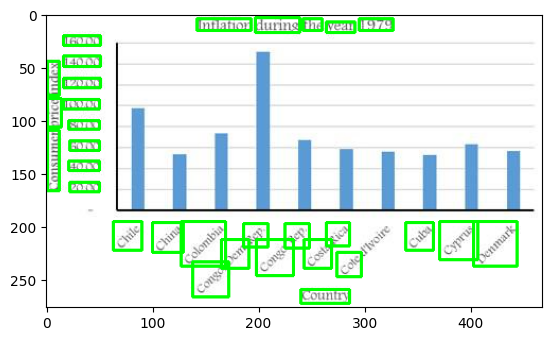

In [16]:
image = cv2.imread(os.path.join(INPUT_DIR, 'images/Part_1/'+''.join(image_paths[index])))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for text in text_bb[image_paths[index]]:
    [x, y, w, h] = text[1]
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(image)
plt.show()

In [9]:
print(image_paths[444])

01e70cd19470.jpg
